# lab3: Multi-class Classification and Neural Networks

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as op
import scipy
from scipy import io

## 1. load data

In [2]:
data = io.loadmat('ex3data1.mat')
print(type(data))
print(list(data.keys()))

<class 'dict'>
['__header__', '__version__', '__globals__', 'X', 'y']


In [3]:
X = data['X']
y = data['y']
y[y==10] = 0 #方便python索引
print('X.size = ' + str(X.shape))
print('y.size = ' + str(y.shape))

X.size = (5000, 400)
y.size = (5000, 1)


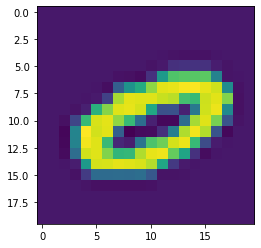

In [4]:
test_X = X[2,:].reshape((20,20))

plt.imshow(test_X)

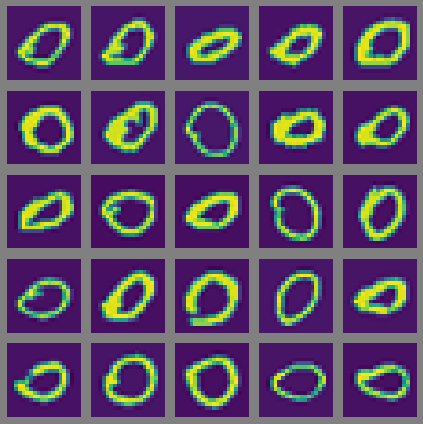

In [5]:
def plot_img(X):
    number = 5
    fig = plt.figure(figsize=(6.0,6.0), facecolor='gray')
    for i in range(number*number):
        fig.add_subplot(number, number, i+1)
        tmp = X[i,:].reshape((20,20))
        plt.imshow(tmp)
        plt.xticks([])  #去掉x轴
        plt.yticks([])  #去掉y轴
        plt.axis('off')  #去掉坐标轴

    plt.tight_layout()

plot_img(X)

## 2. cost and gradient

In [6]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [7]:
def costFunc(theta, X, y, lambd):
    '''
    args:
        X - X.size=(5000,401)
        y - y.size=(5000,1)
        theta - theta.size=(401,1)
    '''
    m = X.shape[0]
    n = X.shape[1]
    theta = theta.reshape((n,1))
    h = sigmoid(np.dot(X,theta))
    term1 = -y*np.log(h)
    term2 = -(1-y)*np.log(1-h)
    # 注意这里正则化从theta1平方开始累加，注意2m
    J = np.sum(term1+term2)/m + lambd/(2*m)*np.sum(theta[1:,:]**2)

    return J

In [8]:
def gradient(theta, X, y, lambd):
    '''
    args:
        X - X.size=(5000,401)
        y - y.size=(5000,1)
        theta - theta.size=(401,1)
    '''
    m = X.shape[0]
    n = X.shape[1]
    theta = theta.reshape((n,1))
    h = sigmoid(np.dot(X, theta))
    # 同样是从theta1开始变化
    grad = np.dot(X.T, h-y)/m
    grad[1:,0] += theta[1:,0]*lambd/m

    return grad

In [9]:
# test
theta_t = [[-2], [-1], [1], [2]]
theta_t = np.array(theta_t)
X_t = np.hstack((np.ones((5,1)), np.arange(1,16).reshape(3,5).T/10))
y_t = np.array([[1], [0], [1], [0], [1]])
lambd_t = 3
J = costFunc(theta_t, X_t, y_t, lambd_t)
grad = gradient(theta_t, X_t, y_t, lambd_t)
J,grad

(2.534819396109744,
 array([[ 0.14656137],
        [-0.54855841],
        [ 0.72472227],
        [ 1.39800296]]))

## 3. One Vs All
这里对每一个标签（一共10个）进行选择

In [10]:
def oneVsAll(X, y, num_label, lambd):
    m = X.shape[0]
    n = X.shape[1]
    init_theta = np.zeros((n,1))
    all_theta = np.zeros((num_label, n))
    for i in range(num_label):
        digit_y = (y==i).astype(int)
        # 注意在gradient和costFunc中，theta要作为第一参数
        result = op.minimize(fun=costFunc, x0=init_theta, args=(X, digit_y, lambd), method='TNC', jac=gradient)
        all_theta[i,:] = result.x
    return all_theta

In [11]:
X = np.hstack((np.ones((X.shape[0],1)), X))
all_theta = oneVsAll(X, y, 10, lambd=0.1)

## 4. predict


In [12]:
def predictOneVsAll(all_theta, X):
    '''
    args:
        all_theta - all_theta.shape=(10, 401)
        X - X.shape=(5000, 401)
        predict - predict.shape=(5000,1)
    '''
    m = X.shape[0]
    n = X.shape[1]
    y = sigmoid(np.dot(X, all_theta.T))
    # 选取每一行中的最大值的下标
    predict = np.argmax(y, axis=1).reshape((m,1))
    return predict

In [13]:
p = predictOneVsAll(all_theta, X)
print('Train accuracy = {}%'.format(100*np.mean(p==y)) )

Train accuracy = 96.46000000000001%
